In [1]:
from tensorflow.keras.datasets import mnist
(train_Data, train_Label),(test_Data, test_Label) = mnist.load_data()
# 查看 mnist 資料集大小
print('train data =',len(train_Data))
print('test data =',len(test_Data))
# 查看 mnist 資料集維度
print('train data dim =',train_Data.shape)
print('test data dim =',test_Data.shape)

train data = 60000
test data = 10000
train data dim = (60000, 28, 28)
test data dim = (10000, 28, 28)


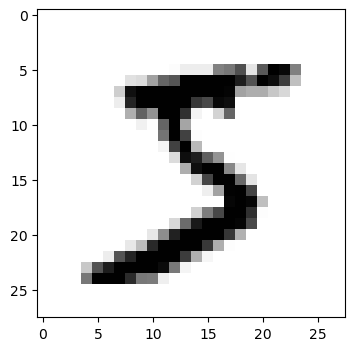

In [2]:
import matplotlib.pyplot as plt

def plot_image(data):
    fig = plt.gcf()
    fig.set_size_inches(4,4)
    plt.imshow(data, cmap = 'binary')
    plt.show()

plot_image(train_Data[0])

In [3]:
print('train_Label[0] = ',train_Label[0])

train_Label[0] =  5


In [4]:
import tensorflow as tf
learning_rate = 0.01   # 學習率
training_epoch = 50   # 訓練次數
batch_size = 500      # 每次訓練大小
# mnist 資料的前置處理
# 將原本是 28x28 的影像大小攤平成 784, 未來要當作輸入特徵
train_Data_R, test_Data_R = train_Data.reshape([-1,784]).astype('float32')\
                           ,test_Data.reshape([-1,784]).astype('float32')
# 資料正規化
train_Data_R, test_Data_R = train_Data_R/255., test_Data_R/255.
# 將資料打散並分批
train_Data_M = tf.data.Dataset.from_tensor_slices((train_Data_R,train_Label))
train_Data_M = train_Data_M.shuffle(5000).batch(batch_size)

Metal device set to: Apple M1


2022-10-21 11:33:30.577011: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 11:33:30.577150: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# 最後的 Dense(10) 且 activation 用 softmax
# 代表最後 output 為 10 個 class （0~9）的機率
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# 隨機梯度下降優化器。
optimizer = tf.keras.optimizers.SGD(learning_rate)
# 定義損失計算
def cross_entropy_loss(x, y):#(預測值,真實值)
    # 選擇交叉熵當損失函數.
    scce = tf.keras.losses.SparseCategoricalCrossentropy()
    loss = scce(y,x)
    # 計算平均損失
    return tf.reduce_mean(loss)

In [7]:
# 計算準確率
def accuracy(y_pred, y_true):
    # tf.argmax(y_pred, 1) 返回 y_pred 維度為 1 的最大索引跟正確值做比較
    correct_prediction = tf.equal(tf.argmax(y_pred, 1),
                                  tf.cast(y_true, tf.int64))
    # 計算平均正確率
    return tf.reduce_mean(tf.cast(correct_prediction,
                                  tf.float32), axis=-1)

In [8]:
for epoch in range(training_epoch):
    for step, (batch_data, batch_label) in enumerate(train_Data_M):
        with tf.GradientTape() as tape:
            pre_data = model(batch_data)
            # Compute loss.
            loss = cross_entropy_loss(pre_data, batch_label)
            acc = accuracy(pre_data, batch_label)
            
            trainable_variables = model.trainable_variables
            # 計算梯度
            gradients = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(gradients, trainable_variables))

    # 每訓練完一個 EPOCH, 就拿測試集來測試準確率
    Testprec = model(test_Data_R)
    Testloss = cross_entropy_loss(Testprec, test_Label)
    Testacc = accuracy(Testprec, test_Label)
    print("Testloss: %f, Testaccuracy: %f" % (Testloss, Testacc))

Testloss: 0.273553, Testaccuracy: 0.919800
Testloss: 0.210568, Testaccuracy: 0.937900
Testloss: 0.167514, Testaccuracy: 0.949700
Testloss: 0.142942, Testaccuracy: 0.956500
Testloss: 0.129167, Testaccuracy: 0.962200
Testloss: 0.114728, Testaccuracy: 0.964100
Testloss: 0.106647, Testaccuracy: 0.966800
Testloss: 0.099207, Testaccuracy: 0.967900
Testloss: 0.094247, Testaccuracy: 0.971100
Testloss: 0.090399, Testaccuracy: 0.972000
Testloss: 0.084677, Testaccuracy: 0.973600
Testloss: 0.083980, Testaccuracy: 0.973700
Testloss: 0.082701, Testaccuracy: 0.974700
Testloss: 0.078760, Testaccuracy: 0.976200
Testloss: 0.079787, Testaccuracy: 0.976500
Testloss: 0.078982, Testaccuracy: 0.977300
Testloss: 0.080655, Testaccuracy: 0.976200
Testloss: 0.073649, Testaccuracy: 0.978200
Testloss: 0.074666, Testaccuracy: 0.977000
Testloss: 0.072285, Testaccuracy: 0.978200
Testloss: 0.072504, Testaccuracy: 0.978500
Testloss: 0.072912, Testaccuracy: 0.977800
Testloss: 0.074935, Testaccuracy: 0.978100
Testloss: 0